<a href="https://colab.research.google.com/github/bamacgabhann/IEOS2023/blob/main/ieos2023/3_Vector_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vector Data

In the Data Types notebook, we looked at how computers can store data as text strings (str), whole number integers (int), decimal number floats (float), dates, times, and number of other formats. One we mentioned specifically was coordinates, for which I mentioned the idea of coordinates as tuples.

Tuples can be used for coordinates because coordinates don't come as single numbers. We'll look at different forms of coordinates soon, but even the simplest coordinates come as at least two numbers - an x coordinate, and a y coordinate. We use tuples so that we can store those numbers together.

In [1]:
x_coordinate = 5
y_coordinate = 9

x_coordinate, y_coordinate

(5, 9)

This is not very useful, because we'd have to keep referencing both. Much easier to do

In [2]:
my_coordinates = (5, 9)
my_coordinates

(5, 9)

In [3]:
type(my_coordinates)

tuple

It just keeps things simpler to store the pairs of coordinates together.

You don't need to define your own coordinates, though, because the module Shapely already has classes which define data types for coordinates of shapes. These are the building blocks of geospatial data processing. 

In the following sections, we'll use these, along with the module matplotlib to draw plots, and GeoPandas to be an intermediary between Shapely and matplotlib. We'll come back to GeoPandas properly in a bit.

## 1. Points

This coordinate refers to a single Point. That's the basic building block of all coordinate systems, to be able to refer to a particular spot. We could plot this:

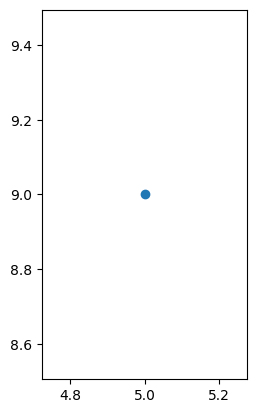

In [4]:
from shapely.geometry import Point
import matplotlib.pyplot as plt
import geopandas as gpd

gpd.GeoSeries(Point(my_coordinates)).plot()
plt.show()

We can plot multiple coordinates, if we want.

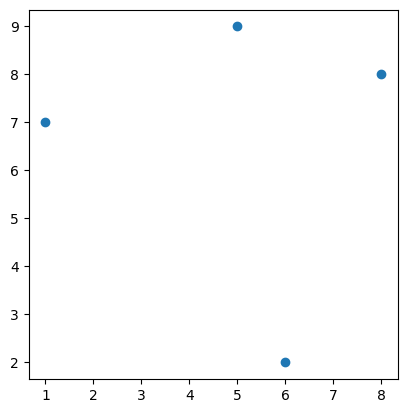

In [5]:
gpd.GeoSeries([Point(1, 7), Point(6, 2), Point(8, 8), Point(5, 9)]).plot()
plt.show()

These points could represent anything - the positions of people, or trees, or points along a cycle path.

## 2. Lines

What if it is points along a cycle path, though? Is separate points the best way to show this? Might it not be better to join them up to show the actual path?

Yes, we can do that.

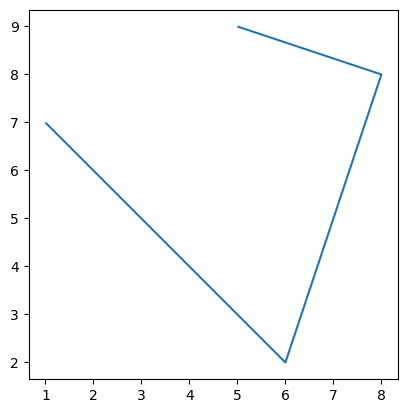

In [6]:
from shapely import LineString
gpd.GeoSeries(LineString([(1, 7), (6, 2), (8, 8), (5, 9)])).plot()
plt.show()

In Python, the module `shapely` is used to define objects of different geometries. While tuples are a built-in basic data type in Python, shapely geometry objects such as Point and Linestring are defined within the shapely module. Once you're using that module, though, these have exactly the same validity as built-in data types like lists and tuples.

It's not just Python and shapely, though - the same is true of any geospatial software. Some may do it in different ways, but all will have defined data types for point coordinates, and for lines which are formed from multiple point coordinates.

It's a simple matter of associating the points together, so that the program understands those points aren't just individual points, but are actually connected together.

One benefit of defining a data type for this is that the order of points in the line is fixed. After all, the coordinates above could form a very different line.

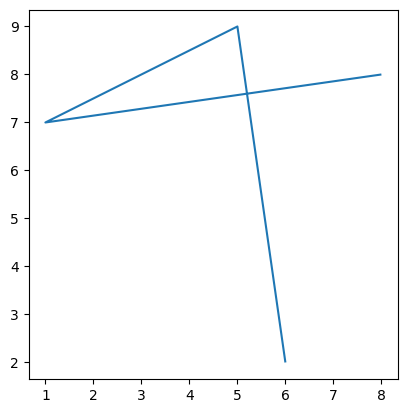

In [7]:
gpd.GeoSeries(LineString([(6, 2), (5, 9), (1, 7), (8, 8)])).plot()
plt.show()

That's the same points as the previous - just in a different order. Using a shapely Linestring object for them keeps them in an intended order, and avoids things like accidentally rearranging the points - not something you'd want to do if you're planning where to build a cycle lane, for example!

## 3. Polygons

What if our coordinates aren't a cycle lane, but are the boundary of a field? In other words, what if the two ends of the line shouldn't just stop, but should be joined together?

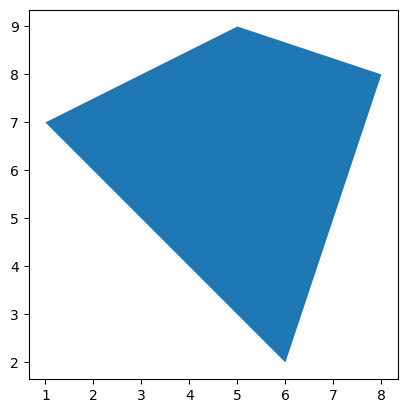

In [8]:
from shapely import Polygon
gpd.GeoSeries(Polygon([(1, 7), (6, 2), (8, 8), (5, 9)])).plot()
plt.show()

You can see in that code cell that we call these polygons. So, an open series of coordinates, where the ends are not connected to each other, would be a LineString, but where they join together they form a Polygon.

These are the three fundamental geometry types in what is referred to as Vector geometry. Each of these shapes - Points, LineStrings, and Polygons - are defined by numerical coordinates for single points, which can remain as single points or form part of an ordered series which can be open or closed.

We can define whatever shape we want using these.

The position of a person, or a tree, the corner of a house, the centre of a roundabout, the location of a water level monitor in a river, or an air pollution monitor beside a road: Point.

The path of a cycle lane or a road, a fence, the course of a river, the path of a bird in flight: LineString.

The outline of a house, the area covered by a flood, the boundaries of a field, the border of a country: Polygon.

## 4. Multi-part shapes

Sometimes, you'll want to keep a collection of points together - not because they're forming a line, but because they're all part of one object. For example, a fixed set of sample locations.

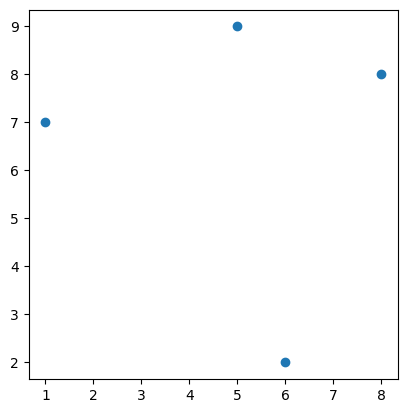

In [9]:
from shapely import MultiPoint
my_multipoint = MultiPoint([(1, 7), (6, 2), (8, 8), (5, 9)])

gpd.GeoSeries(my_multipoint).plot()
plt.show()

While this looks the same as our original points plot, it's stored as a single object, which means we can perform operations on it as a single object.

Or you might have a collection of lines. For example, a road might include a line for each side, plus lines for each lane, a cycle path, a footpath. You might have a collection of lines to represent a river network which includes tributaries, and so can't be represented by one single line.

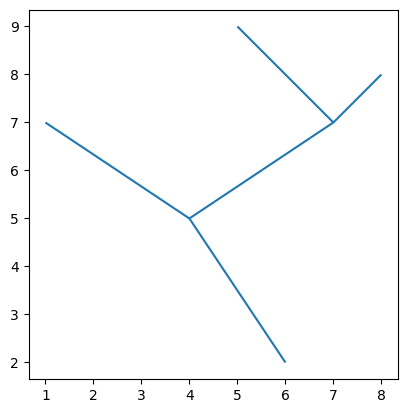

In [10]:
from shapely import MultiLineString
my_multilinestring = MultiLineString([[(6, 2), (4, 5), (7, 7), (5, 9)], [(4, 5), (1, 7)], [(7, 7), (8, 8)]])

gpd.GeoSeries(my_multilinestring).plot()
plt.show()

Likewise, you might have a collection of polygons which represent a single object - for example a property which comprises multiple buildings, or mutiple land parcels.

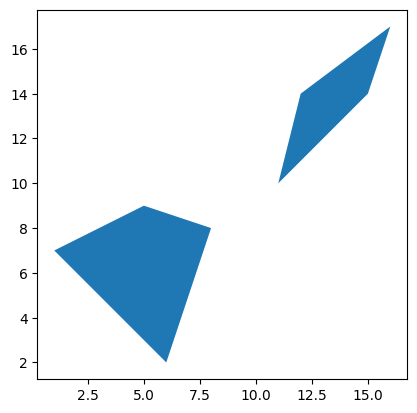

In [11]:
from shapely import MultiPolygon
my_multipolygon = MultiPolygon([[((1, 7), (6, 2), (8, 8), (5, 9))], [((12, 14), (16, 17), (15, 14), (11, 10))]])

gpd.GeoSeries(my_multipolygon).plot()
plt.show()

## 5. Arrays, series, and dataframes

If we have a lot of variables of the same kind, it would be inefficient to store them all separately.

In [12]:
a = 5
b = 9
c = 8
d = 3

Each of these variables is going to be stored in a different chunk of memory. If we want to do some data transformation to all of them, we could do it, but it would be rather awkward and slow - especially, as is usually the case with geospatial datasets, you have thousands of numbers, not just four or five. Some of the data I work with involves 100,000 datapoints for a day - and I've processed a over a year's worth of data in one go. Something in the region of 50 million data points. If they were all separate variables, that would take a very long time.

Instead, thanks to the library (_=a collection of modules_) _NumPy_, we can store a set of related numbers as an array. 

<img src="https://github.com/numpy/numpy/blob/main/branding/logo/primary/numpylogo.png?raw=true" style="height:60px" alt="NumPy logo"/>

A NumPy array is of a single data type, so the interpreter doesn't have to check the type for each variable, and it holds the values in contiguous blocks of memory, so that operations don't involve the computer searching all over the drive to find the next variable. 

There's now other libraries which do the same thing, in slightly different ways - one I'm growing quite attached to is _Apache Arrow_. 

<img src="https://arrow.apache.org/img/arrow-logo_horizontal_black-txt_white-bg.png" style="height:60px" alt="Apache Arrow logo"/>

But that's complicated territory, so just remember the name for when you get there yourself.

Now, a NumPy or Arrow array is just a list of numbers, it doesn't have anything associated with it. One of the most powerful libraries for data processing is _pandas_.

<img src="https://pandas.pydata.org/static/img/pandas.svg" style="height:60px" alt="Pandas logo"/>

Pandas uses NumPy or Arrow arrays to construct either a DataSeries or DataFrame. You don't need to even interact with NumPy for this - it's all handled by pandas behind the scenes.

In [13]:
import pandas as pd

In [14]:
series = pd.Series([5, 9, 8, 3])
series

0    5
1    9
2    8
3    3
dtype: int64

Instead of variables a-d, we now have a series which is _indexed_. And we can do a lot of powerful operations on that series. 

In [15]:
from datetime import datetime as dt
hghg = dt.now()
print(hghg)

2023-11-29 19:52:25.747278


In [16]:
series.describe()

count    4.000000
mean     6.250000
std      2.753785
min      3.000000
25%      4.500000
50%      6.500000
75%      8.250000
max      9.000000
dtype: float64

Just a small example. And what if we have more than one list of related data? For example, my air pollution research involves measuring particulate pollution of two different sizes, along with pressure, temperature, and humidity. Plus date and time of measurement. That could be 6 separate series - or it could be one DataFrame.

In [17]:
df = pd.DataFrame({"Measurement_time": ["2023-11-01 08:00:00", "2023-11-01 08:00:30", "2023-11-01 08:01:00", "2023-11-01 08:01:30", "2023-11-01 08:02:00"], "PM2.5": [3,4,6,2,3], "PM10": [5,6,5,3,4], "Pressure": [1012,1012,1012,1013,1013], "Temperature": [12,12,13,13,13], "Humidity": [86,86,87,87,87]})
df

,Measurement_time,PM2.5,PM10,Pressure,Temperature,Humidity
0,2023-11-01 08:00:00,3,5,1012,12,86
1,2023-11-01 08:00:30,4,6,1012,12,86
2,2023-11-01 08:01:00,6,5,1012,13,87
3,2023-11-01 08:01:30,2,3,1013,13,87
4,2023-11-01 08:02:00,3,4,1013,13,87


Now, we're cooking. 

Oh by the way, let me take this opportunity to demonstrate the point of using ```black``` for code formatting. The above cell is without using black. Here's the same code but using black:

In [18]:
df = pd.DataFrame(
    {
        "Measurement_time": [
            "2023-11-01 08:00:00",
            "2023-11-01 08:00:30",
            "2023-11-01 08:01:00",
            "2023-11-01 08:01:30",
            "2023-11-01 08:02:00",
        ],
        "PM2.5": [3, 4, 6, 2, 3],
        "PM10": [5, 6, 5, 3, 4],
        "Pressure": [1012, 1012, 1012, 1013, 1013],
        "Temperature": [12, 12, 13, 13, 13],
        "Humidity": [86, 86, 87, 87, 87],
    }
)
df

,Measurement_time,PM2.5,PM10,Pressure,Temperature,Humidity
0,2023-11-01 08:00:00,3,5,1012,12,86
1,2023-11-01 08:00:30,4,6,1012,12,86
2,2023-11-01 08:01:00,6,5,1012,13,87
3,2023-11-01 08:01:30,2,3,1013,13,87
4,2023-11-01 08:02:00,3,4,1013,13,87


See how much more readable that is?

## 6. GeoSeries and GeoDataFrames: GeoPandas

We can do even better, though. Build on top of pandas is the library GeoPandas, which adds geospatial properties and functionality to pandas. 

<img src="https://geopandas.org/en/stable/_images/geopandas_logo.png" style="height:60px" alt="GeoPandas logo"/>

A GeoPandas GeoSeries is a subclass of a pandas Series, and a GeoDataFrame is a subclass of a pandas DataFrame. So, anything you can do in pandas, you can do in GeoPandas - now with added geospatial information.

A GeoSeries is a series of Shapely Point, Line, or Polygon coordinates: a geometry series.

A GeoDataFrame is a DataFrame with one column being a geometry GeoSeries. 

In [1]:
import geopandas as gpd
from shapely import Point

By the way, when I'm using these abbreviations on import - these aren't mine, these are conventions. I'm not able to say for sure how they got to be conventions, but in any case, the vast majority of code you'll find online has

```import numpy as np```  
```import pandas as pd```  
```import geopandas as gpd```  

Some are probably just from common use, but there are some which came from the creator. For example, we probably won't get to consider seaborn, which is another plotting library, but you'll probably come across it eventually. You might think it should be import seaborn as sb or sn, but it's actually

```import seaborn as sns```

because that's the initials of the character Samuel Normal Seaborn from The West Wing. 

Python people are just like this sometimes, I don't know what to tell you. I'm right there as well, and I'm not apologising for it. Also, I might mention that Python is not named after the snake, even if that's the interpretation implied by the existence of Anaconda - it's named after Monty Python, and you will very often see python tutorials using Monty Python references in their example code, e.g. ```spam``` for variable names. If you don't like it, well, the R tutorial is at 11.30.

In [28]:
gdf = gpd.GeoDataFrame(
    {
        "Meas_time": [
            "2023-11-01 08:00:00",
            "2023-11-01 08:00:30",
            "2023-11-01 08:01:00",
            "2023-11-01 08:01:30",
            "2023-11-01 08:02:00",
        ],
        "PM2.5": [3, 4, 6, 2, 3],
        "PM10": [5, 6, 5, 3, 4],
        "Pressure": [1012, 1012, 1012, 1013, 1013],
        "Temperature": [12, 12, 13, 13, 13],
        "Humidity": [86, 86, 87, 87, 87],
        "geometry": [Point(555173, 654321), Point(555173, 654321), Point(555173, 654321), Point(555173, 654321), Point(555173, 654321)],
    }
)
gdf

,Meas_time,PM2.5,PM10,Pressure,Temperature,Humidity,geometry
0,2023-11-01 08:00:00,3,5,1012,12,86,POINT (555173.000 654321.000)
1,2023-11-01 08:00:30,4,6,1012,12,86,POINT (555173.000 654321.000)
2,2023-11-01 08:01:00,6,5,1012,13,87,POINT (555173.000 654321.000)
3,2023-11-01 08:01:30,2,3,1013,13,87,POINT (555173.000 654321.000)
4,2023-11-01 08:02:00,3,4,1013,13,87,POINT (555173.000 654321.000)


Now, we're _really_ getting somewhere.

Where are we getting though? Because we don't know what type of coordinates they are, do we?

In [29]:
print(gdf.crs)

None


GeoDataFrame is a class in GeoPandas. We saw in our class definition above that classes can have properties which are defined as ```self.property```. The GeoDataFrame class includes a ```self.crs``` property describing the coordinate reference system of the data. This defaults to None, which isn't particularly useful, but isn't as bad as having a wrong crs. The CRS should be declared when creating the GeoDataFrame, for example the previous should be been created as:

In [30]:
gdf = gpd.GeoDataFrame(
    {
        "Meas_time": [
            "2023-11-01 08:00:00",
            "2023-11-01 08:00:30",
            "2023-11-01 08:01:00",
            "2023-11-01 08:01:30",
            "2023-11-01 08:02:00",
        ],
        "PM2.5": [3, 4, 6, 2, 3],
        "PM10": [5, 6, 5, 3, 4],
        "Pressure": [1012, 1012, 1012, 1013, 1013],
        "Temperature": [12, 12, 13, 13, 13],
        "Humidity": [86, 86, 87, 87, 87],
        "geometry": [Point(555173, 654321), Point(555173, 654321), Point(555173, 654321), Point(555173, 654321), Point(555173, 654321)],
    },
    crs=2157
)
gdf

,Meas_time,PM2.5,PM10,Pressure,Temperature,Humidity,geometry
0,2023-11-01 08:00:00,3,5,1012,12,86,POINT (555173.000 654321.000)
1,2023-11-01 08:00:30,4,6,1012,12,86,POINT (555173.000 654321.000)
2,2023-11-01 08:01:00,6,5,1012,13,87,POINT (555173.000 654321.000)
3,2023-11-01 08:01:30,2,3,1013,13,87,POINT (555173.000 654321.000)
4,2023-11-01 08:02:00,3,4,1013,13,87,POINT (555173.000 654321.000)


In [31]:
gdf.crs

<Projected CRS: EPSG:2157>
Name: IRENET95 / Irish Transverse Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore. United Kingdom (UK) - Northern Ireland (Ulster) - onshore.
- bounds: (-10.56, 51.39, -5.34, 55.43)
Coordinate Operation:
- name: Irish Transverse Mercator
- method: Transverse Mercator
Datum: IRENET95
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## 7. Coordinate Reference Systems

pyproj is a library which is designed to handle coordinate reference systems. 

<img src="https://pyproj4.github.io/pyproj/stable/_static/logo.png" style="height:60px" alt="pyproj logo"/>

Like NumPy, it is written in C, so although it's called from python, all the computation is done at a compiled level. 

pyproj can interpret references to a CRS in numerous different formats. From the pyproj documentation (https://pyproj4.github.io/pyproj/stable/api/crs/crs.html#pyproj.crs.CRS.from_user_input):

 -  PROJ string  
 - Dictionary of PROJ parameters 
 - PROJ keyword arguments for parameters  
 - JSON string with PROJ parameters  
 - CRS WKT string  
 - An authority string, e.g. ```'epsg:4326'```  
 - An EPSG integer e.g. ```'4326'```  
 - A tuple of (“auth_name”: “auth_e.g.”) e.g. ```('epsg',   '4326')```  
 - An object with a ```to_wkt``` method  
 - A ```pyproj.crs.CRS``` class 

pyproj allows for the definition of custom coordinate reference systems, and as per the list above, can essentially handle any pre-defined crs. It also facilitates transformations between coordinate reference systems. Using the above example:

In [32]:
gdf = gdf.to_crs(4326)
gdf

,Meas_time,PM2.5,PM10,Pressure,Temperature,Humidity,geometry
0,2023-11-01 08:00:00,3,5,1012,12,86,POINT (-8.66229 52.63825)
1,2023-11-01 08:00:30,4,6,1012,12,86,POINT (-8.66229 52.63825)
2,2023-11-01 08:01:00,6,5,1012,13,87,POINT (-8.66229 52.63825)
3,2023-11-01 08:01:30,2,3,1013,13,87,POINT (-8.66229 52.63825)
4,2023-11-01 08:02:00,3,4,1013,13,87,POINT (-8.66229 52.63825)


In [33]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [51]:
gdf = gdf.to_crs('+proj=laea +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 +ellps=GRS80 +units=m +no_defs +type=crs')
gdf

,Meas_time,PM2.5,PM10,Pressure,Temperature,Humidity,geometry
0,2023-11-01 08:00:00,3,5,1012,12,86,POINT (3073629.327 3442472.493)
1,2023-11-01 08:00:30,4,6,1012,12,86,POINT (3073629.327 3442472.493)
2,2023-11-01 08:01:00,6,5,1012,13,87,POINT (3073629.327 3442472.493)
3,2023-11-01 08:01:30,2,3,1013,13,87,POINT (3073629.327 3442472.493)
4,2023-11-01 08:02:00,3,4,1013,13,87,POINT (3073629.327 3442472.493)


In [52]:
gdf.crs

<Projected CRS: +proj=laea +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3 ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Lambert Azimuthal Equal Area
Datum: Unknown based on GRS 1980 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## 8. Reading and writing files

So, now you know you can handle geospatial vector data in a GeoPandas GeoDataFrame, using NumPy (or Arrow) behind the scenes, with Shapely handling the vector coordinates and pyproj managing the CRS. That's a pretty good place to start, but the one thing we haven't covered yet is getting the data in and out. In the examples above, we just used data which had been typed in - but again, you could be dealing with datasets including millions of rows or columns. Nobody's typing that in. So, we need to be able to read and write files.

Of course, this is also built in. GeoPandas uses <a href='https://fiona.readthedocs.io/en/stable/manual.html'>_Fiona_</a> to handle <a href='https://geopandas.org/en/stable/docs/user_guide/io.html'>file reading</a>. The Fiona library can handle pretty much any geospatial file format you can think of. Let's import some air pollution sensor data:



In [23]:
%time pollution = gpd.read_file('../sample data/LimerickAir10_2021-01-22_FrRRd.csv')
pollution.head()

CPU times: user 7.89 s, sys: 1.01 s, total: 8.9 s
Wall time: 12.1 s


,Timestamp,Temp,Pressure,Humidity,PM2.5,PM10,X,Y,Sensor,geometry
0,00:00.1,3.06,990.3533034040203,70.96570929345917,12,15,555173,654321,LimerickAir10,None
1,00:00.8,3.07,990.3707707,70.97151776750785,11,13,555173,654321,LimerickAir10,None
2,00:02.3,3.05,990.4350836621986,70.95890094262319,11,13,555173,654321,LimerickAir10,None
3,00:03.0,3.05,990.3902352499202,70.95931001367742,8,11,555173,654321,LimerickAir10,None
4,00:03.7,3.07,990.3974712662953,70.97151776750785,8,11,555173,654321,LimerickAir10,None


Note the _%time_ magic marker - that just measures how long a process takes. It's not core python, but it is a core part of the ipykernel used by Jupyter. Handy! There's other magic markers too.

```geopandas.GeoDataFrame.head()``` shows the top rows of the dataframe, just as a quick view. So this has geospatial data, but it's a CSV file, and the coordinates are just as X and Y columns, not shapely Points. Easy fix:

In [24]:
pollution['geometry'] = gpd.points_from_xy(pollution['X'], pollution['Y'])
pollution.head()

,Timestamp,Temp,Pressure,Humidity,PM2.5,PM10,X,Y,Sensor,geometry
0,00:00.1,3.06,990.3533034040203,70.96570929345917,12,15,555173,654321,LimerickAir10,POINT (555173.000 654321.000)
1,00:00.8,3.07,990.3707707,70.97151776750785,11,13,555173,654321,LimerickAir10,POINT (555173.000 654321.000)
2,00:02.3,3.05,990.4350836621986,70.95890094262319,11,13,555173,654321,LimerickAir10,POINT (555173.000 654321.000)
3,00:03.0,3.05,990.3902352499202,70.95931001367742,8,11,555173,654321,LimerickAir10,POINT (555173.000 654321.000)
4,00:03.7,3.07,990.3974712662953,70.97151776750785,8,11,555173,654321,LimerickAir10,POINT (555173.000 654321.000)


We don't have a CRS defined, so let's add that:

In [26]:
print(pollution.crs)

None


In [29]:
pollution = pollution.set_crs(2157)
print(pollution.crs)
pollution.head()

EPSG:2157


,Timestamp,Temp,Pressure,Humidity,PM2.5,PM10,X,Y,Sensor,geometry
0,00:00.1,3.06,990.3533034040203,70.96570929345917,12,15,555173,654321,LimerickAir10,POINT (555173.000 654321.000)
1,00:00.8,3.07,990.3707707,70.97151776750785,11,13,555173,654321,LimerickAir10,POINT (555173.000 654321.000)
2,00:02.3,3.05,990.4350836621986,70.95890094262319,11,13,555173,654321,LimerickAir10,POINT (555173.000 654321.000)
3,00:03.0,3.05,990.3902352499202,70.95931001367742,8,11,555173,654321,LimerickAir10,POINT (555173.000 654321.000)
4,00:03.7,3.07,990.3974712662953,70.97151776750785,8,11,555173,654321,LimerickAir10,POINT (555173.000 654321.000)


We don't need the X and Y columns anymore:

In [30]:
pollution = pollution.drop(['X', 'Y'], axis=1)
pollution.head()

,Timestamp,Temp,Pressure,Humidity,PM2.5,PM10,Sensor,geometry
0,00:00.1,3.06,990.3533034040203,70.96570929345917,12,15,LimerickAir10,POINT (555173.000 654321.000)
1,00:00.8,3.07,990.3707707,70.97151776750785,11,13,LimerickAir10,POINT (555173.000 654321.000)
2,00:02.3,3.05,990.4350836621986,70.95890094262319,11,13,LimerickAir10,POINT (555173.000 654321.000)
3,00:03.0,3.05,990.3902352499202,70.95931001367742,8,11,LimerickAir10,POINT (555173.000 654321.000)
4,00:03.7,3.07,990.3974712662953,70.97151776750785,8,11,LimerickAir10,POINT (555173.000 654321.000)


In [ ]:
<img src="" style="height:60px" alt=" logo"/>